In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#@title Instalar librerías

!pip install rdkit
!pip install Biopython
!pip install pandarallel
!pip install py3Dmol

In [ ]:
#@title Abrir el dataframe

import os
import pandas as pd

input_folder = "/content/drive/MyDrive/TFM/T2/Analisis_dataframe_final"
input_file = os.path.join(input_folder, "df_filtro_binana_final.csv")
df_harm = pd.read_csv(input_file, sep = ',')
print(df_harm.shape[0],df_harm.columns)

70378 Index(['level_0', 'index', 'PDB_entry_id', 'Classification', 'Organism',
       'Uniprot_id', 'Ligand_id', 'Ligand_InChi', 'Experimental_method',
       'Resolution', 'Adding_Classification', 'Affinity', 'Coordenadas',
       'Ligand_smiles', 'Mol_Weight', 'n_atoms', 'Nombre', 'Classification_y',
       'Count_general', 'Count_diff'],
      dtype='object')


In [ ]:
#@title comprobar output USR grupos ligandos

list_output_USR_ligandos = os.listdir("/content/drive/MyDrive/TFM/T2/Ultrafast_Shape_Recognition/Output_USR")

In [ ]:
print(len(list_output_USR_ligandos))

2947


In [ ]:
list_output_USR_ligandos_1 = [i.replace("USR_","").replace(".csv","") for i in list_output_USR_ligandos]

In [ ]:
list_output_USR_ligandos_1

In [ ]:
ligandos_unicos_dataframe = list(set(df_harm['Ligand_id'].tolist()))
print(len(ligandos_unicos_dataframe))

2871


In [ ]:
#@title identifiar faltas si hay

falta_ligandos = []

for ligando in ligandos_unicos_dataframe:
  if ligando not in list_output_USR_ligandos_1:
    falta_ligandos.append(ligando)

print(len(falta_ligandos))

0


In [ ]:
# Cargar el CSV
data = pd.read_csv('/content/drive/MyDrive/TFM/T2/Ultrafast_Shape_Recognition/Output_USR/USR_ZUG.csv', sep =",")

In [ ]:
data

,conformation,USR_1,USR_2,USR_3,USR_4,USR_5,USR_6,USR_7,USR_8,USR_9,USR_10,USR_11,USR_12
0,7H3L_ZUG_A_201_ligando.pdb,2.60211,0.55344,1.58605,2.71058,1.00357,1.68454,4.65412,4.27332,1.39335,3.90970,3.49398,1.48828
1,7HGJ_ZUG_B_103_ligando.pdb,2.60158,0.55241,1.68382,2.69778,0.96451,1.75775,4.65805,4.24226,1.40495,4.03841,3.86655,1.45409
2,7HGJ_ZUG_C_102_ligando.pdb,2.60963,0.70572,1.40609,2.74285,1.15831,1.65831,4.68817,4.75830,1.42396,4.07293,4.19733,1.43186
3,7HZN_ZUG_A_208_ligando.pdb,2.69763,0.61508,1.60044,2.82472,1.17135,1.60020,4.82595,4.86704,1.35914,3.98175,4.05339,1.37996


In [ ]:
#@title Función matrix de similitud

import os
import pandas as pd
import numpy as np

input_folder = "/content/drive/MyDrive/TFM/T2/Ultrafast_Shape_Recognition/Output_USR"
output_folder = "/content/drive/MyDrive/TFM/T2/Ultrafast_Shape_Recognition/Similarity_Matrices"

os.makedirs(output_folder, exist_ok=True)

for archivo in os.listdir(input_folder):
    archivo_file = os.path.join(input_folder, archivo)
    data = pd.read_csv(archivo_file, sep=",")

    nombre_ligando = archivo.replace("USR_","").replace(".csv","")

    descriptor_cols = [col for col in data.columns if col.startswith('USR_')]

    # Función de similitud USR
    def usr_similarity(vec1, vec2):
        return 1 / (1 + (np.sum(np.abs(vec1 - vec2)) / len(vec1)))

    # Calcular la matriz de similitud para todas las conformaciones
    descriptors = data[descriptor_cols].values
    n = descriptors.shape[0]
    sim_matrix = np.zeros((n, n))

    for i in range(n):
        for j in range(i, n):
            sim = usr_similarity(descriptors[i], descriptors[j])
            sim_matrix[i, j] = sim
            sim_matrix[j, i] = sim


    sim_df = pd.DataFrame(sim_matrix, index=data['conformation'], columns=data['conformation'])

    output_file = os.path.join(output_folder, f"sim_matrix_{nombre_ligando}.csv")
    sim_df.to_csv(output_file)

    print(f"Guardada matriz de similitud: {output_file}")









In [ ]:
lista_instancias = df_harm['Nombre'].tolist()
print(len(lista_instancias))

70378


In [ ]:
lista_instancias

In [ ]:
#@title Realizar matriz de similitud solo instancias

import os
import pandas as pd
import numpy as np

input_folder = "/content/drive/MyDrive/TFM/T2/Ultrafast_Shape_Recognition/Output_USR"
output_folder = "/content/drive/MyDrive/TFM/T2/Ultrafast_Shape_Recognition/Similarity_Matrices_solo_instancias"

os.makedirs(output_folder, exist_ok=True)

for archivo in os.listdir(input_folder):
    archivo_file = os.path.join(input_folder, archivo)
    data = pd.read_csv(archivo_file, sep=",")


    data['conformation_norm'] = data['conformation'].str.replace('_ligando.pdb', '', regex=False).str.strip().str.lower()
    lista_instancias_norm = [x.strip().lower() for x in lista_instancias]


    data_filtrada = data[data['conformation_norm'].isin(lista_instancias_norm)]

    if data_filtrada.empty:
        print(f"No se encontraron conformaciones válidas en {archivo}, se omite.")
        continue

    nombre_ligando = archivo.replace("USR_","").replace(".csv","")

    descriptor_cols = [col for col in data_filtrada.columns if col.startswith('USR_')]

    # Función de similitud USR
    def usr_similarity(vec1, vec2):
        return 1 / (1 + (np.sum(np.abs(vec1 - vec2)) / len(vec1)))

    # Calcular la matriz de similitud
    descriptors = data_filtrada[descriptor_cols].values
    n = descriptors.shape[0]
    sim_matrix = np.zeros((n, n))

    for i in range(n):
        for j in range(i, n):
            sim = usr_similarity(descriptors[i], descriptors[j])
            sim_matrix[i, j] = sim
            sim_matrix[j, i] = sim

    sim_df = pd.DataFrame(sim_matrix, index=data_filtrada['conformation'], columns=data_filtrada['conformation'])

    output_file = os.path.join(output_folder, f"sim_matrix_{nombre_ligando}.csv")
    sim_df.to_csv(output_file)

    print(f"Guardada matriz de similitud: {output_file}")



In [ ]:
#lista_instancias

In [ ]:
#@title Crear el resumen de las similitudes

import os
import pandas as pd
import numpy as np

input_folder = "/content/drive/MyDrive/TFM/T2/Ultrafast_Shape_Recognition/Similarity_Matrices_solo_instancias"
resultados = []

for archivo in os.listdir(input_folder):
    if archivo.endswith(".csv"):
        archivo_file = os.path.join(input_folder, archivo)
        df = pd.read_csv(archivo_file, index_col=0)

        sim_matrix = df.values

        if sim_matrix.shape[0] > 1:
            off_diag = sim_matrix[~np.eye(sim_matrix.shape[0], dtype=bool)]
            min_sim = np.min(off_diag)
            mean_sim = np.mean(off_diag)
        else:
            min_sim = 1.0
            mean_sim = 1.0

        resultados.append({
            'ligando': archivo.replace("sim_matrix_", ""),
            'min_sim': min_sim,
            'mean_sim': mean_sim
        })

resultados_df = pd.DataFrame(resultados)

output_file = "/content/drive/MyDrive/TFM/T2/Ultrafast_Shape_Recognition/similitud_resumen_solo_instancias.csv"
resultados_df.to_csv(output_file, index=False)

print(f"Resumen guardado en: {output_file}")


Resumen guardado en: /content/drive/MyDrive/TFM/T2/Ultrafast_Shape_Recognition/similitud_resumen_solo_instancias.csv


In [ ]:
df_resumen = pd.read_csv("/content/drive/MyDrive/TFM/T2/Ultrafast_Shape_Recognition/similitud_resumen_solo_instancias.csv",sep = ',')

In [ ]:
df_resumen['ligando'] = df_resumen['ligando'].str.replace('.csv', '', regex=False)

In [ ]:
df_resumen.head()

,ligando,min_sim,mean_sim
0,BGP,0.813222,0.880186
1,2Q2,0.926891,0.926891
2,3VV,0.092402,0.287425
3,AVI,0.660516,0.872269
4,CUR,0.298726,0.481452


In [ ]:
df_resumen.shape[0]

2871

In [ ]:
import pandas as pd

df_resumen = pd.read_csv("/content/drive/MyDrive/TFM/T2/Ultrafast_Shape_Recognition/similitud_resumen_df_solo_instancias.csv",sep = ',')

In [ ]:
df_resumen.shape[0]

2871

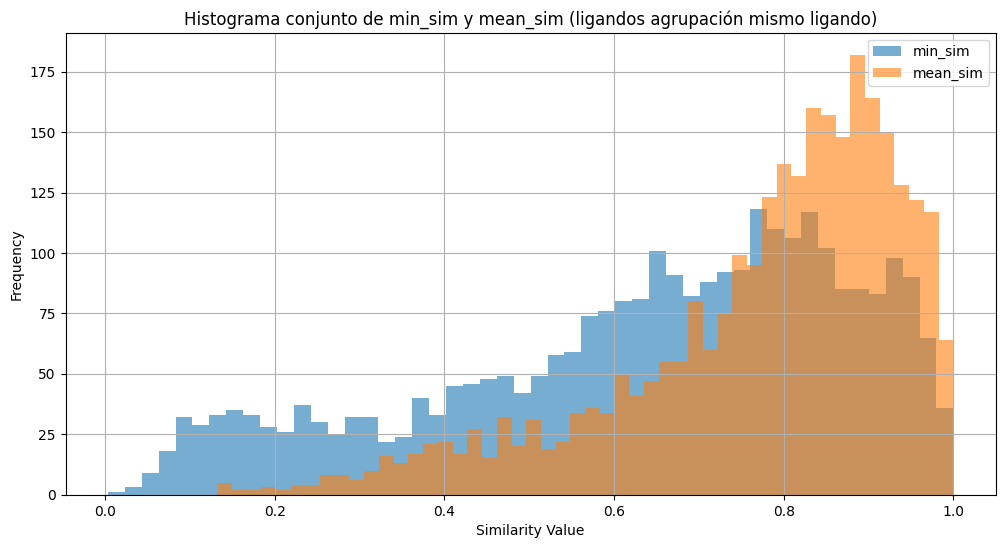

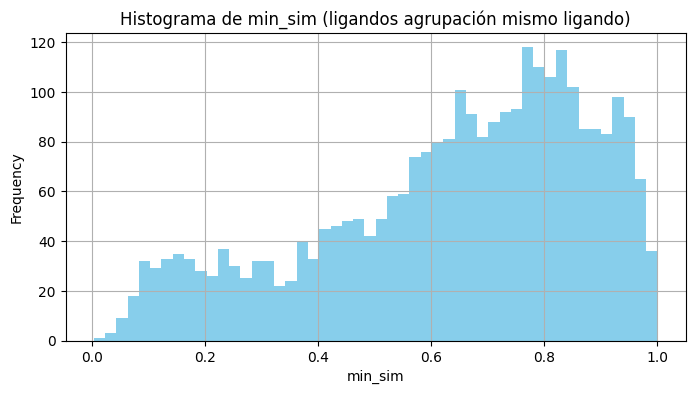

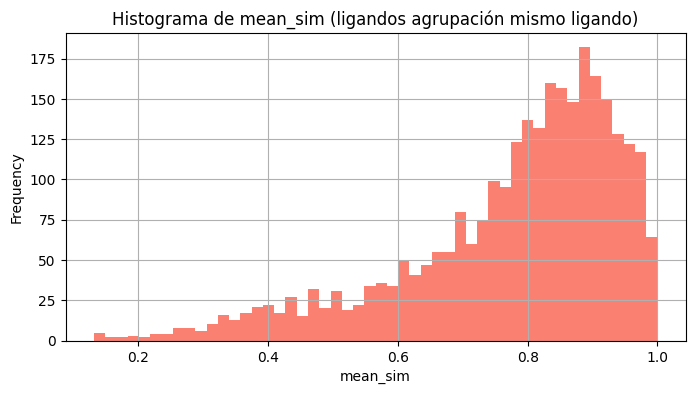

In [ ]:
#@title Realizar histogramas del conjunto total

import pandas as pd
import matplotlib.pyplot as plt

# Histograma conjunto
plt.figure(figsize=(12, 6))
plt.hist(df_resumen['min_sim'], bins=50, alpha=0.6, label='min_sim')
plt.hist(df_resumen['mean_sim'], bins=50, alpha=0.6, label='mean_sim')
plt.xlabel('Similarity Value')
plt.ylabel('Frequency')
plt.title('Histograma conjunto de min_sim y mean_sim (ligandos agrupación mismo ligando)')
plt.legend()
plt.grid(True)
plt.show()

# Histograma individual para min_sim
plt.figure(figsize=(8, 4))
plt.hist(df_resumen['min_sim'], bins=50, color='skyblue')
plt.xlabel('min_sim')
plt.ylabel('Frequency')
plt.title('Histograma de min_sim (ligandos agrupación mismo ligando)')
plt.grid(True)
plt.show()

# Histograma individual para mean_sim
plt.figure(figsize=(8, 4))
plt.hist(df_resumen['mean_sim'], bins=50, color='salmon')
plt.xlabel('mean_sim')
plt.ylabel('Frequency')
plt.title('Histograma de mean_sim (ligandos agrupación mismo ligando)')
plt.grid(True)
plt.show()


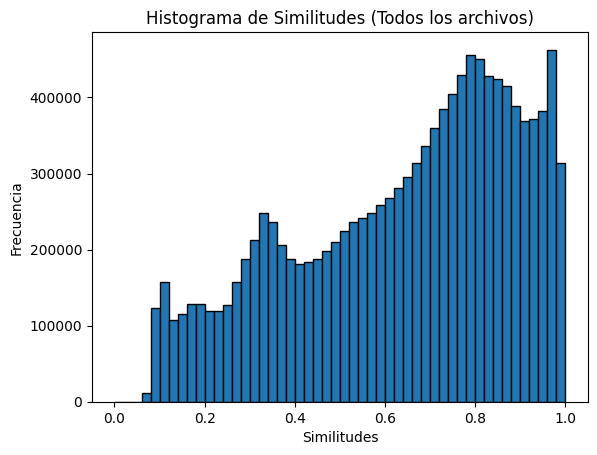

In [ ]:
#@title Histograma del total

import os
import matplotlib.pyplot as plt
import pandas as pd

similitudes_totales = []

carpeta_csv = "/content/drive/MyDrive/TFM/T2/Ultrafast_Shape_Recognition/Similarity_Matrices_solo_instancias"

lista_instancias_norm = [x.strip().lower() for x in lista_instancias]

for archivo in os.listdir(carpeta_csv):
    if archivo.endswith(".csv"):
        df = pd.read_csv(os.path.join(carpeta_csv, archivo))

        if 'conformation' in df.columns:
            df.index = df['conformation']
            df = df.drop(columns=['conformation'])

        df.index = df.index.str.replace('_ligando.pdb', '', regex=False).str.strip().str.lower()
        df.columns = df.columns.str.replace('_ligando.pdb', '', regex=False).str.strip().str.lower()

        # 3. Seleccionar solo filas y columnas que están en lista_instancias
        instancias_validas = [x for x in df.index if x in lista_instancias_norm]
        df_filtrado = df.loc[instancias_validas, instancias_validas]

        if df_filtrado.empty:
            print(f"No hay datos válidos en {archivo} después del filtrado.")
            continue

        for i in range(df_filtrado.shape[0]):
            for j in range(i + 1, df_filtrado.shape[1]):
                similitudes_totales.append(df_filtrado.iloc[i, j])

# Crear el histograma
plt.hist(similitudes_totales, bins=50, range=(0, 1), edgecolor='black')
plt.title('Histograma de Similitudes (Todos los archivos)')
plt.xlabel('Similitudes')
plt.ylabel('Frecuencia')
plt.show()

